Number of possible tokenizations: 430
Longest tokenization (length 12): ['C', 'h', 'i', 'l', 'i', ' ', 'p', 'e', 'p', 'p', 'e', 'r']
Shortest tokenization (length 3): ['Ch', 'ili', ' pepper']


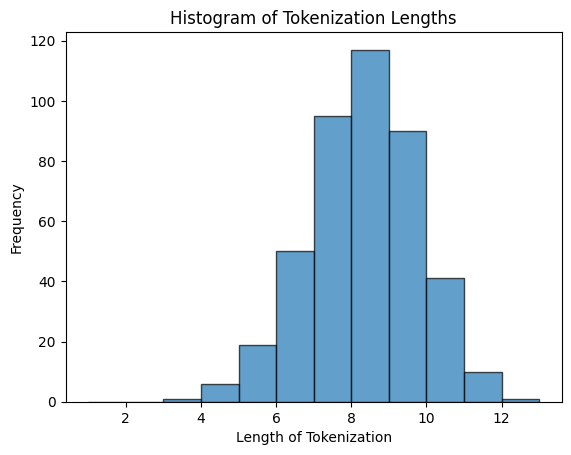

In [2]:
from transformers import GPT2Tokenizer
import matplotlib.pyplot as plt
from transformers import AutoTokenizer
import matplotlib.pyplot as plt
from wonderwords import RandomWord

# Function to find and print the longest tokenization
def analyze_tokenizations(tokenizations):
    if not tokenizations:
        print("No tokenizations found.")
        return
    
    # Find the longest tokenization
    longest_tokenization = max(tokenizations, key=len)
    print(f"Longest tokenization (length {len(longest_tokenization)}): {longest_tokenization}")
    
    shortest_tokenization = min(tokenizations, key=len)
    print(f"Shortest tokenization (length {len(shortest_tokenization)}): {shortest_tokenization}")
    
    # Plot histogram of tokenization lengths
    lengths = [len(t) for t in tokenizations]
    plt.hist(lengths, bins=range(1, max(lengths) + 2), edgecolor='black', alpha=0.7)
    plt.title("Histogram of Tokenization Lengths")
    plt.xlabel("Length of Tokenization")
    plt.ylabel("Frequency")
    plt.show()
# Function to recursively find all possible tokenizations
def find_tokenizations(sentence, tokenizer, memo=None):
    if memo is None:
        memo = {}
    
    if sentence in memo:
        return memo[sentence]
    
    # If the sentence is empty, return an empty tokenization
    if not sentence:
        return [[]]
    
    tokenizations = []
    
    # Try all possible prefixes
    for i in range(1, len(sentence) + 1):
        prefix = sentence[:i]
        rest = sentence[i:]
        
        # Check if the prefix can be tokenized as a single token
        encoded_prefix = tokenizer.encode(prefix, add_special_tokens=False)
        if len(encoded_prefix) == 1:  # Valid token if it encodes to exactly one token
            rest_tokenizations = find_tokenizations(rest, tokenizer, memo)
            for rest_tokenization in rest_tokenizations:
                tokenizations.append([prefix] + rest_tokenization)
    
    memo[sentence] = tokenizations
    return tokenizations

# Main function to print possible tokenizations
# Main function to print possible tokenizations and analyze them
def main(sentence):
    # Load the GPT2 tokenizer
    tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
    
    # Get all tokenizations
    tokenizations = find_tokenizations(sentence, tokenizer)
    
    # Print the number of possible tokenizations
    print(f"Number of possible tokenizations: {len(tokenizations)}")
    
    # Analyze tokenizations
    analyze_tokenizations(tokenizations)

# Example usage
if __name__ == "__main__":
    sentence = "Chili pepper"
    main(sentence)

In [3]:
from transformers import AutoTokenizer

# Replace with the correct model identifier
model_id = "meta-llama/Meta-Llama-3-8B"

# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_id)

# Access the vocabulary
vocab = tokenizer.get_vocab()

# Display the size of the vocabulary
print(f"Vocabulary size: {len(vocab)}")

# Optionally, display the first 10 tokens
for i, (token, index) in enumerate(vocab.items()):
    if i == 10:
        break
    print(f"Token: {token}, Index: {index}")


Vocabulary size: 128256
Token: `:, Index: 45722
Token: Ġdrowned, Index: 74995
Token: american, Index: 78818
Token: ĠØ¯ÙĨÛĮØ§, Index: 119032
Token: Payments, Index: 88746
Token: ĠMessi, Index: 71105
Token: ĠÐ¸Ð·ÑĥÑĩ, Index: 123438
Token: (id, Index: 3809
Token: _Master, Index: 81781
Token: à¤¾,, Index: 101201


Number of possible tokenizations: 768
Longest tokenization (length 13): ['T', 'h', 'e', ' ', 'M', 'i', 'l', 'k', 'y', ' ', 'W', 'a', 'y']
Shortest tokenization (length 3): ['The', ' Milky', ' Way']


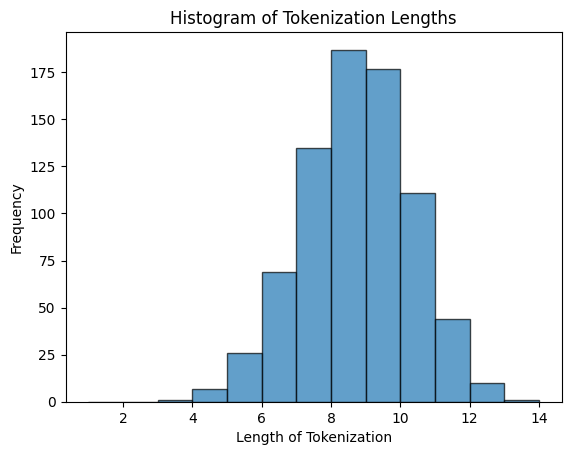

In [7]:
from transformers import AutoTokenizer
import matplotlib.pyplot as plt

# Function to find and print the longest tokenization
def analyze_tokenizations(tokenizations):
    if not tokenizations:
        print("No tokenizations found.")
        return
    
    # Find the longest tokenization
    longest_tokenization = max(tokenizations, key=len)
    print(f"Longest tokenization (length {len(longest_tokenization)}): {longest_tokenization}")
    
    # Find the shortest tokenization
    shortest_tokenization = min(tokenizations, key=len)
    print(f"Shortest tokenization (length {len(shortest_tokenization)}): {shortest_tokenization}")
    
    # Plot histogram of tokenization lengths
    lengths = [len(t) for t in tokenizations]
    plt.hist(lengths, bins=range(1, max(lengths) + 2), edgecolor='black', alpha=0.7)
    plt.title("Histogram of Tokenization Lengths")
    plt.xlabel("Length of Tokenization")
    plt.ylabel("Frequency")
    plt.show()

# Function to recursively find all possible tokenizations
def find_tokenizations(sentence, tokenizer, memo=None):
    if memo is None:
        memo = {}
    
    if sentence in memo:
        return memo[sentence]
    
    # Base case: if the sentence is empty, return an empty tokenization
    if not sentence:
        return [[]]
    
    tokenizations = []
    
    # Try all possible prefixes
    for i in range(1, len(sentence) + 1):
        prefix = sentence[:i]
        rest = sentence[i:]
        
        # Check if the prefix is a valid token (encodes to exactly one token)
        encoded_prefix = tokenizer.encode(prefix, add_special_tokens=False)
        if len(encoded_prefix) == 1:
            for rest_tokenization in find_tokenizations(rest, tokenizer, memo):
                tokenizations.append([prefix] + rest_tokenization)
    
    memo[sentence] = tokenizations
    return tokenizations

# Main function: takes an input string and returns all tokenizations using the Llama 3 vocabulary
def main(input_string):
    # Load the Llama 3 tokenizer
    # Replace "meta-llama/Meta-Llama-3-8B-Instruct" with the correct model identifier if needed.
    tokenizer = AutoTokenizer.from_pretrained("meta-llama/Meta-Llama-3-8B-Instruct", use_auth_token=True)
    
    # Get all tokenizations for the input string
    tokenizations = find_tokenizations(input_string, tokenizer)
    
    # Print the number of possible tokenizations
    print(f"Number of possible tokenizations: {len(tokenizations)}")
    
    # Analyze tokenizations (print longest/shortest and display histogram)
    analyze_tokenizations(tokenizations)
    
    # Return the list of tokenizations
    return tokenizations

# Example usage: prompt for input and process it
if __name__ == "__main__":
    input_string = input("Enter a string to tokenize with Llama 3 vocabulary: ")
    tokenizations = main(input_string)


[nltk_data] Downloading package punkt to /Users/ander/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/ander/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/ander/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to /Users/ander/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


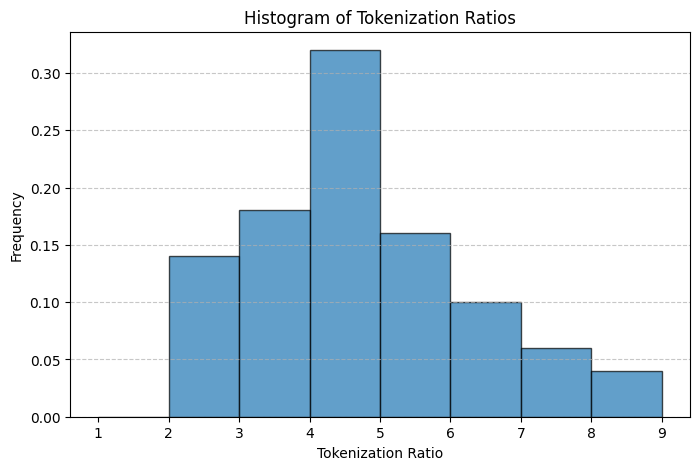

Average ratio over 50 sentences: 4.63


In [22]:
import random
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from transformers import AutoTokenizer
from faker import Faker
import numpy as np

# Ensure necessary resources for sentence tokenization
nltk.download("punkt")
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')

# Initialize Faker for text generation
fake = Faker()

# Recursively finds all valid tokenizations for a given sentence
def find_tokenizations(sentence, tokenizer, memo=None):
    if memo is None:
        memo = {}
    if sentence in memo:
        return memo[sentence]
    if not sentence:
        return [[]]

    tokenizations = []
    for i in range(1, len(sentence) + 1):
        prefix = sentence[:i]
        rest = sentence[i:]
        encoded_prefix = tokenizer.encode(prefix, add_special_tokens=False)
        if len(encoded_prefix) == 1:
            for rest_tokenization in find_tokenizations(rest, tokenizer, memo):
                tokenizations.append([prefix] + rest_tokenization)

    memo[sentence] = tokenizations
    return tokenizations

# Calculates the ratio (longest_tokenization - shortest_tokenization) / shortest_tokenization
def calculate_tokenization_ratio(sentence, tokenizer):
    tokenizations = find_tokenizations(sentence, tokenizer)
    if not tokenizations:
        return None
    longest = max(len(t) for t in tokenizations)
    shortest = min(len(t) for t in tokenizations)
    if shortest == 0:
        return None
    return (longest - shortest) / shortest

def generate_sentences(num_sentences=100, words_per_sentence=10):
    """
    Generates structured sentences using the Faker library.
    Selects continuous 10-word sequences from generated sentences.
    """
    sentences = [fake.sentence() for _ in range(num_sentences * 2)]  # Generate extra for diversity
    word_sequences = []

    for sentence in sentences:
        words = word_tokenize(sentence)
        if len(words) >= words_per_sentence:
            for i in range(len(words) - words_per_sentence + 1):
                word_sequences.append(" ".join(words[i : i + words_per_sentence]))

    return random.sample(word_sequences, min(num_sentences, len(word_sequences)))

def plot_histogram(ratios):
    """Plots a histogram of tokenization ratios."""
    plt.figure(figsize=(8, 5))
    plt.hist(ratios, bins=[1,2,3,4,5,6,7,8,9], edgecolor="black", alpha=0.7, density=True)
    plt.title("Histogram of Tokenization Ratios")
    plt.xlabel("Tokenization Ratio")
    plt.ylabel("Frequency")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

def main():
    # Load the Llama 3 tokenizer
    tokenizer = AutoTokenizer.from_pretrained("meta-llama/Meta-Llama-3-8B-Instruct", use_auth_token=True)

    # Generate structured 10-word sequences
    sentences = generate_sentences(num_sentences=50, words_per_sentence=3)

    ratios = []
    for i, sentence in enumerate(sentences):
        ratio = calculate_tokenization_ratio(sentence, tokenizer)
        if ratio is not None:
            ratios.append(ratio)
            #print(f"Sentence {i+1}: {sentence}")
            #print(f"Ratio = {ratio:.2f}\n")
    np.save("ratios.npy", ratios)
    # Plot histogram
    if ratios:
        plot_histogram(ratios)
        avg_ratio = sum(ratios) / len(ratios)
        print(f"Average ratio over {len(ratios)} sentences: {avg_ratio:.2f}")

if __name__ == "__main__":
    main()


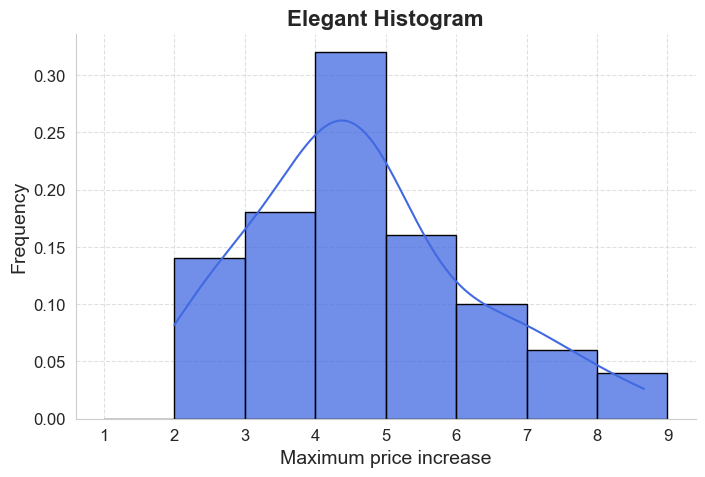

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Sample data (replace with your actual x vector)
x = np.load("ratios.npy") 


# Set style
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))

# Plot histogram
sns.histplot(x, bins=[1,2,3,4,5,6,7,8,9], kde=True, color="royalblue", edgecolor="black", alpha=0.75, stat="density")

# Customize appearance
plt.xlabel("Maximum price increase", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Elegant Histogram", fontsize=16, fontweight="bold")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)

# Remove top and right spines for a cleaner look
sns.despine()

# Show plot
plt.show()